In [1]:
import pandas as pd
import quandl
quandl.ApiConfig.api_key = '4nyydq5k_sPU89Nkvi_Q'
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
from scipy import stats
#import statsmodels.api as sm
#from pandas.core import datetools
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:

# Make calls to the quandl API to get the stock data for our five chosen stocks, for only the variables of interests, for only the first quarter, and put into stock df 
all_stock = quandl.get_table('WIKI/PRICES', ticker=["AAPL", "AMZN", "FB", "SBUX", "TWTR"], 
                             qopts={"columns":["date", "ticker","open", "adj_open", "close","adj_close","volume"]},
                             date = {'gte': '2017-04-01', 'lte': '2018-03-31'}, paginate=True)

# Rename date column to make useful for future merges
all_stock = all_stock.rename(columns={'date':'Date'})

In [3]:
#Create dataframe for each stock
aapl_df = all_stock.loc[all_stock.ticker == 'AAPL', :]
amzn_df = all_stock.loc[all_stock.ticker == 'AMZN', :]
fb_df = all_stock.loc[all_stock.ticker == 'FB', :]
sbux_df = all_stock.loc[all_stock.ticker == 'SBUX', :]
twtr_df = all_stock.loc[all_stock.ticker == 'TWTR', :]

#Calculate previous day prices for Apple
aapl_df['Prev_Day_Close'] = aapl_df['adj_close'].shift(1)
#Subtract previous day close from Today's opening price
aapl_df['Overnight_change'] = aapl_df['adj_open'] - aapl_df['Prev_Day_Close']
#Set date as index
aapl_df.set_index(["Date"], inplace = True)

#Get Apple Sentiment data
apple_sent = quandl.get(['NS1/AAPL_US'], start_date='2017-04-01', end_date='2018-03-31')
apple_sent = apple_sent[['NS1/AAPL_US - Sentiment']]
apple_sent = apple_sent.rename(columns={"NS1/AAPL_US - Sentiment": "AAPL_Sentiment"}) 


#Merge Apple sentiment and stock price dataset
Apple_merged = aapl_df.merge(apple_sent, how = "inner", left_index = True, right_index = True)
Apple_merged['Prev_Day_Sentiment'] = Apple_merged['AAPL_Sentiment'].shift(-1)
Apple_merged['Rolling_mean_19'] = Apple_merged['AAPL_Sentiment'].rolling(19).mean()


C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [4]:
#Calculate previous day prices for Amazon
amzn_df['Prev_Day_Close'] = amzn_df['adj_close'].shift(1)
#Subtract previous day close from Today's opening price
amzn_df['Overnight_change'] = amzn_df['adj_open'] - amzn_df['Prev_Day_Close']
#Set date as index
amzn_df.set_index(["Date"], inplace = True)

#Get Amazon Sentiment data
amzn_sent = quandl.get(['NS1/AMZN_US'], start_date='2017-04-01', end_date='2018-03-31')
amzn_sent = amzn_sent[['NS1/AMZN_US - Sentiment']]
amzn_sent = amzn_sent.rename(columns={"NS1/AMZN_US - Sentiment": "AMZN_Sentiment"}) 


#Merge Amazon sentiment and stock price dataset
Amzn_merged = amzn_df.merge(amzn_sent, how = "inner", left_index = True, right_index = True)
Amzn_merged['Prev_Day_Sentiment'] = Amzn_merged['AMZN_Sentiment'].shift(-1)
Amzn_merged['Rolling_mean_19'] = Amzn_merged['AMZN_Sentiment'].rolling(19).mean()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
#Calculate previous day prices for Facebook
fb_df['Prev_Day_Close'] = fb_df['adj_close'].shift(1)
#Subtract previous day close from Today's opening price
fb_df['Overnight_change'] = fb_df['adj_open'] - fb_df['Prev_Day_Close']
#Set date as index
fb_df.set_index(["Date"], inplace = True)

#Get Facebook Sentiment data
fb_sent = quandl.get(['NS1/FB_US'], start_date='2017-04-01', end_date='2018-03-31')
fb_sent = fb_sent[['NS1/FB_US - Sentiment']]
fb_sent = fb_sent.rename(columns={"NS1/FB_US - Sentiment": "FB_Sentiment"}) 


#Merge Facebook sentiment and stock price dataset
Fb_merged = fb_df.merge(fb_sent, how = "inner", left_index = True, right_index = True)
Fb_merged['Prev_Day_Sentiment'] = Fb_merged['FB_Sentiment'].shift(-1)
Fb_merged['Rolling_mean_19'] = Fb_merged['FB_Sentiment'].rolling(19).mean()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
#Calculate previous day prices for Starbucks
sbux_df['Prev_Day_Close'] = sbux_df['adj_close'].shift(1)
#Subtract previous day close from Today's opening price
sbux_df['Overnight_change'] = sbux_df['adj_open'] - sbux_df['Prev_Day_Close']
#Set date as index
sbux_df.set_index(["Date"], inplace = True)

#Get Starbucks Sentiment data
sbux_sent = quandl.get(['NS1/SBUX_US'], start_date='2017-04-01', end_date='2018-03-31')
sbux_sent = sbux_sent[['NS1/SBUX_US - Sentiment']]
sbux_sent = sbux_sent.rename(columns={"NS1/SBUX_US - Sentiment": "SBUX_Sentiment"}) 


#Merge Starbucks sentiment and stock price dataset
Sbux_merged = sbux_df.merge(sbux_sent, how = "inner", left_index = True, right_index = True)
Sbux_merged['Prev_Day_Sentiment'] = Sbux_merged['SBUX_Sentiment'].shift(-1)
Sbux_merged['Rolling_mean_19'] = Sbux_merged['SBUX_Sentiment'].rolling(19).mean()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [7]:
#Calculate previous day prices for Twitter
twtr_df['Prev_Day_Close'] = twtr_df['adj_close'].shift(1)
#Subtract previous day close from Today's opening price
twtr_df['Overnight_change'] = twtr_df['adj_open'] - twtr_df['Prev_Day_Close']
#Set date as index
twtr_df.set_index(["Date"], inplace = True)

#Get Starbucks Sentiment data
twtr_sent = quandl.get(['NS1/TWTR_US'], start_date='2017-04-01', end_date='2018-03-31')
twtr_sent = twtr_sent[['NS1/TWTR_US - Sentiment']]
twtr_sent = twtr_sent.rename(columns={"NS1/TWTR_US - Sentiment": "TWTR_Sentiment"}) 


#Merge Twitter sentiment and stock price dataset
Twtr_merged = twtr_df.merge(twtr_sent, how = "inner", left_index = True, right_index = True)
Twtr_merged['Prev_Day_Sentiment'] = Twtr_merged['TWTR_Sentiment'].shift(-1)
Twtr_merged['Rolling_mean_19'] = Twtr_merged['TWTR_Sentiment'].rolling(19).mean()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


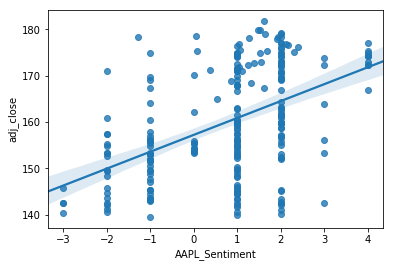

In [8]:
sb.regplot(x='AAPL_Sentiment', y='adj_close', data=Apple_merged)

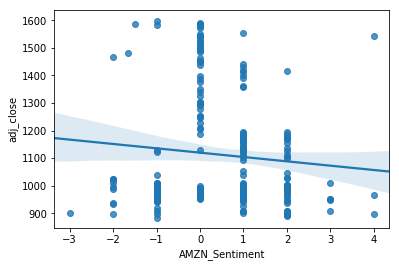

In [9]:
sb.regplot(x='AMZN_Sentiment', y='adj_close', data=Amzn_merged)

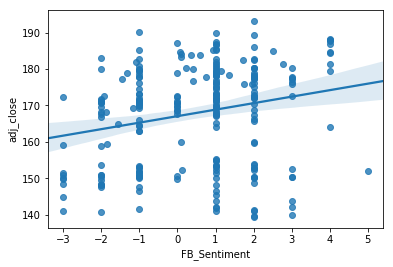

In [10]:
sb.regplot(x='FB_Sentiment', y='adj_close', data=Fb_merged)

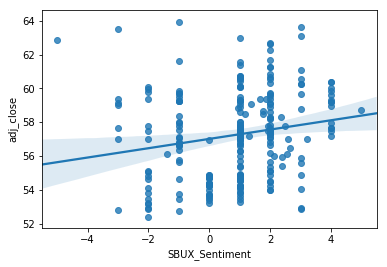

In [11]:
sb.regplot(x='SBUX_Sentiment', y='adj_close', data=Sbux_merged)

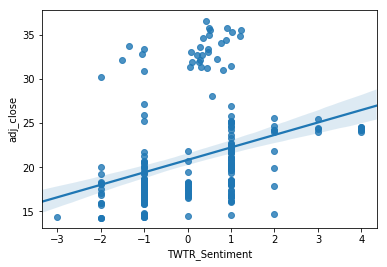

In [12]:
sb.regplot(x='TWTR_Sentiment', y='adj_close', data=Twtr_merged)

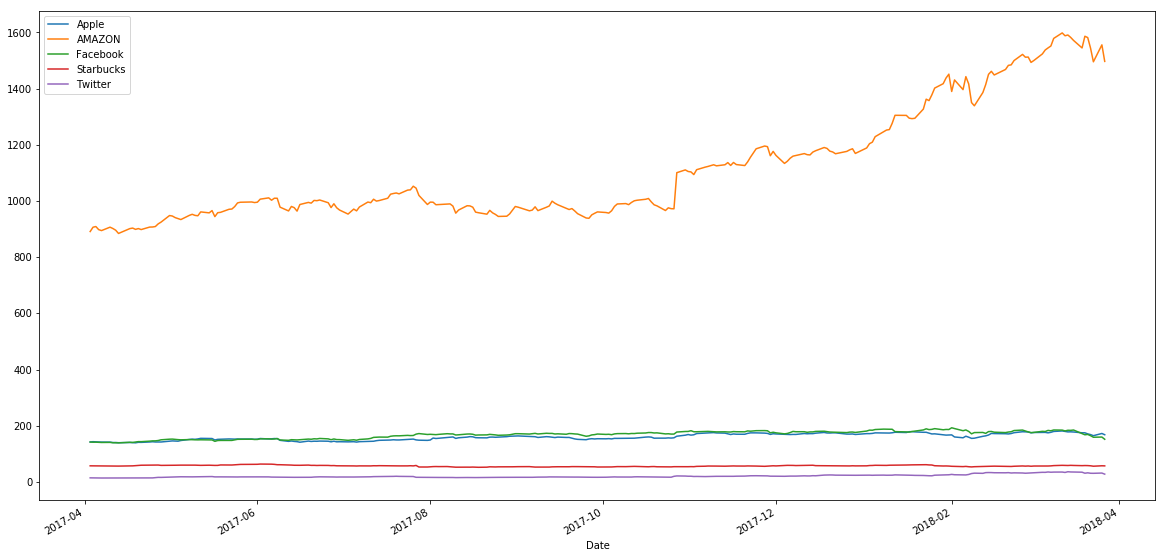

In [13]:
#Overlay Stock prices
ax = Apple_merged['adj_close'].plot(legend=True,figsize=(20,10), label = 'Apple')
Amzn_merged['adj_close'].plot(legend=True,figsize=(20,10),ax=ax, label = 'AMAZON')
Fb_merged['adj_close'].plot(legend=True, figsize=(20,10),ax=ax, label = 'Facebook')
Sbux_merged['adj_close'].plot(legend=True, figsize=(20,10),ax=ax, label = 'Starbucks')
Twtr_merged['adj_close'].plot(legend=True, figsize=(20,10),ax=ax, label = 'Twitter')

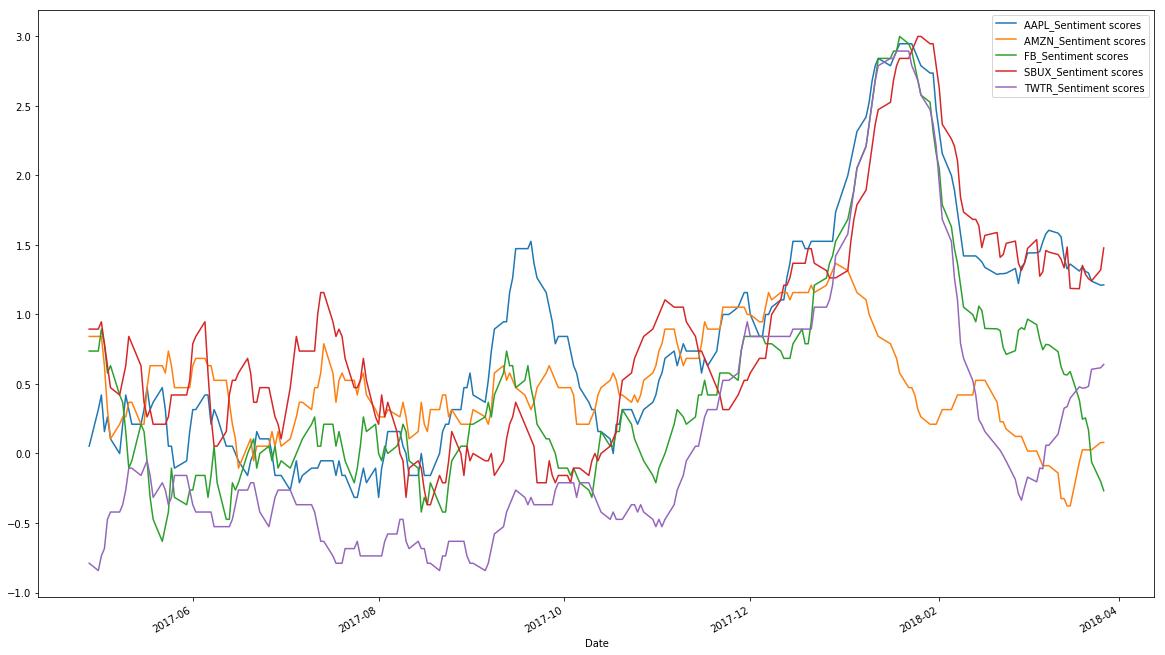

In [14]:
#Overlay rolling sentiment score average
ax = Apple_merged['Rolling_mean_19'].plot(legend=True,figsize=(20,12), label = 'AAPL_Sentiment scores')
Amzn_merged['Rolling_mean_19'].plot(legend=True,figsize=(20,12),ax=ax, label = 'AMZN_Sentiment scores')
Fb_merged['Rolling_mean_19'].plot(legend=True, figsize=(20,12),ax=ax, label = 'FB_Sentiment scores')
Sbux_merged['Rolling_mean_19'].plot(legend=True, figsize=(20,12),ax=ax, label = 'SBUX_Sentiment scores')
Twtr_merged['Rolling_mean_19'].plot(legend=True, figsize=(20,12),ax=ax, label = 'TWTR_Sentiment scores')

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


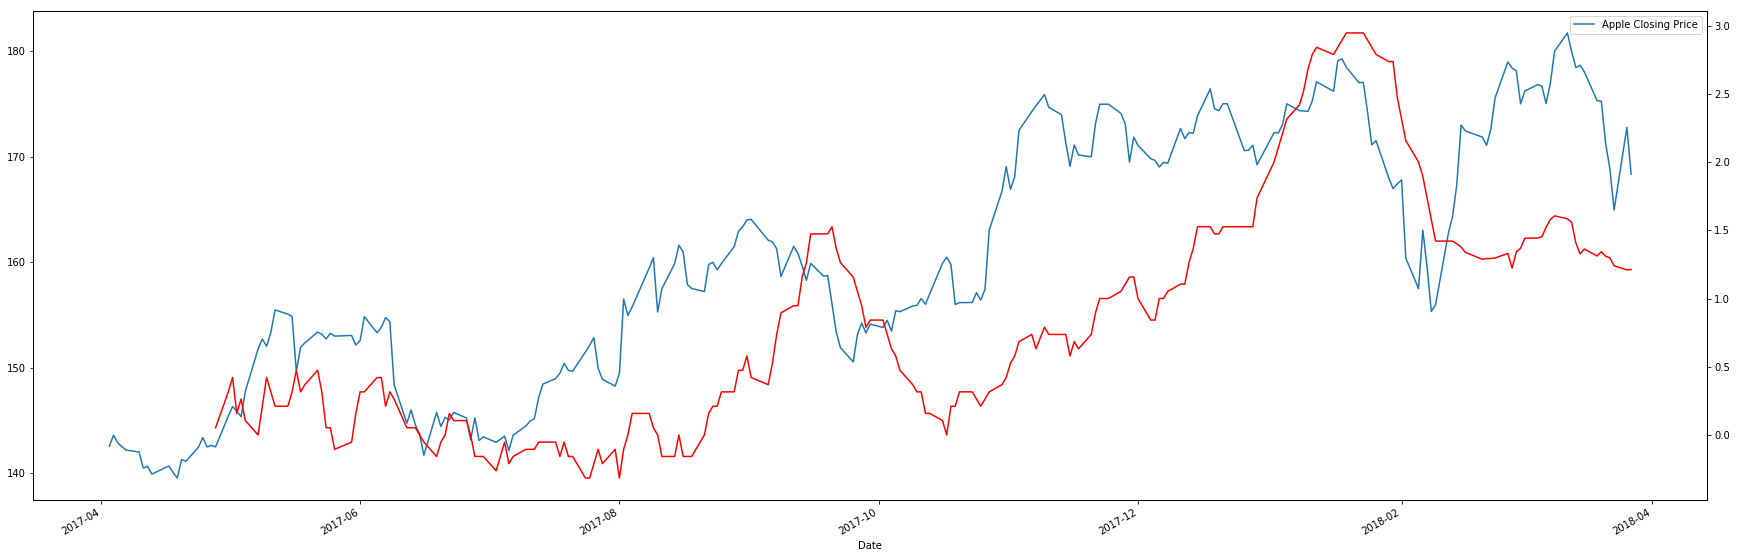

In [15]:
#Apple Sentiment analysis
fig, ax = plt.subplots()
ax2 = ax.twinx()
plt.hold(False)
Apple_merged["adj_close"].plot(ax=ax,kind="line",figsize=(20,10), label='Apple Closing Price')
Apple_merged["Rolling_mean_19"].plot(ax=ax2, style='r-', secondary_y=True, figsize=(30,10), label='Sentiment Index')
ax.legend(loc='best')

In [16]:
model = LinearRegression().fit(Apple_merged[['AAPL_Sentiment']], Apple_merged[['adj_close']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
print("Equation of the line: Y = " + str(round(m[0],2)) + "x + " + str(round(b[0],2)))

Equation of the line: Y = 3.64x + 157.25


In [17]:
#Run Additional Stats
import pandas as pd
import statsmodels.formula.api as sm

result = sm.ols(formula="adj_close ~ AAPL_Sentiment", data=Apple_merged).fit()


print(result.params)
print(result.summary())

Intercept         157.245575
AAPL_Sentiment      3.644333
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              adj_close   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     72.22
Date:                Tue, 10 Apr 2018   Prob (F-statistic):           1.93e-15
Time:                        02:48:55   Log-Likelihood:                -923.17
No. Observations:                 246   AIC:                             1850.
Df Residuals:                     244   BIC:                             1857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


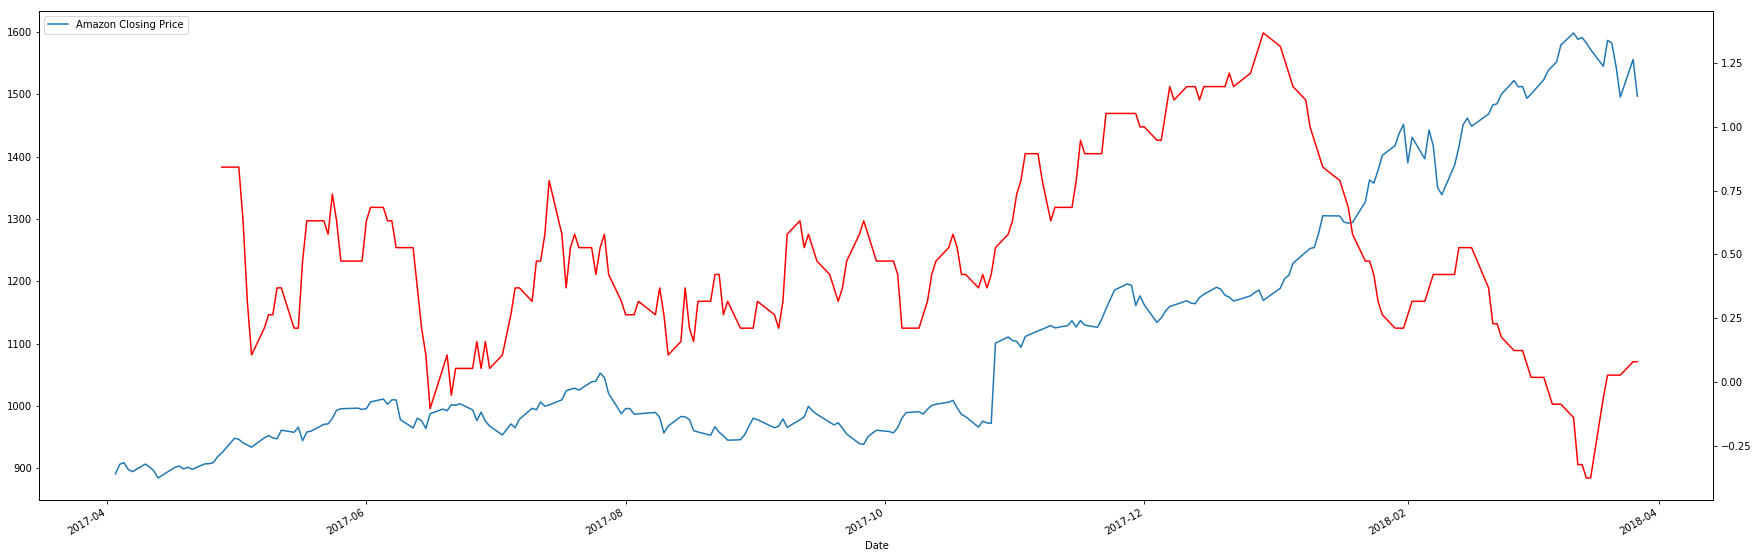

In [18]:
#Anazon Sentiment Analysis
fig, ax = plt.subplots()
ax2 = ax.twinx()
plt.hold(False)
Amzn_merged["adj_close"].plot(ax=ax,kind="line",figsize=(20,10), label='Amazon Closing Price')
Amzn_merged["Rolling_mean_19"].plot(ax=ax2, style='r-', secondary_y=True, figsize=(30,10), label='Sentiment Index')
ax.legend(loc='best')

In [19]:
model = LinearRegression().fit(Amzn_merged[['AMZN_Sentiment']], Amzn_merged[['adj_close']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
print("Equation of the line: Y = " + str(round(m[0],2)) + "x + " + str(round(b[0],2)))

Equation of the line: Y = -15.75x + 1120.09


In [20]:
#Run Additional Stats
import pandas as pd
import statsmodels.formula.api as sm

result = sm.ols(formula="adj_close ~ AMZN_Sentiment", data=Amzn_merged).fit()


print(result.params)
print(result.summary())

Intercept         1120.091541
AMZN_Sentiment     -15.750835
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              adj_close   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.227
Date:                Tue, 10 Apr 2018   Prob (F-statistic):              0.137
Time:                        02:49:01   Log-Likelihood:                -1652.3
No. Observations:                 246   AIC:                             3309.
Df Residuals:                     244   BIC:                             3316.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


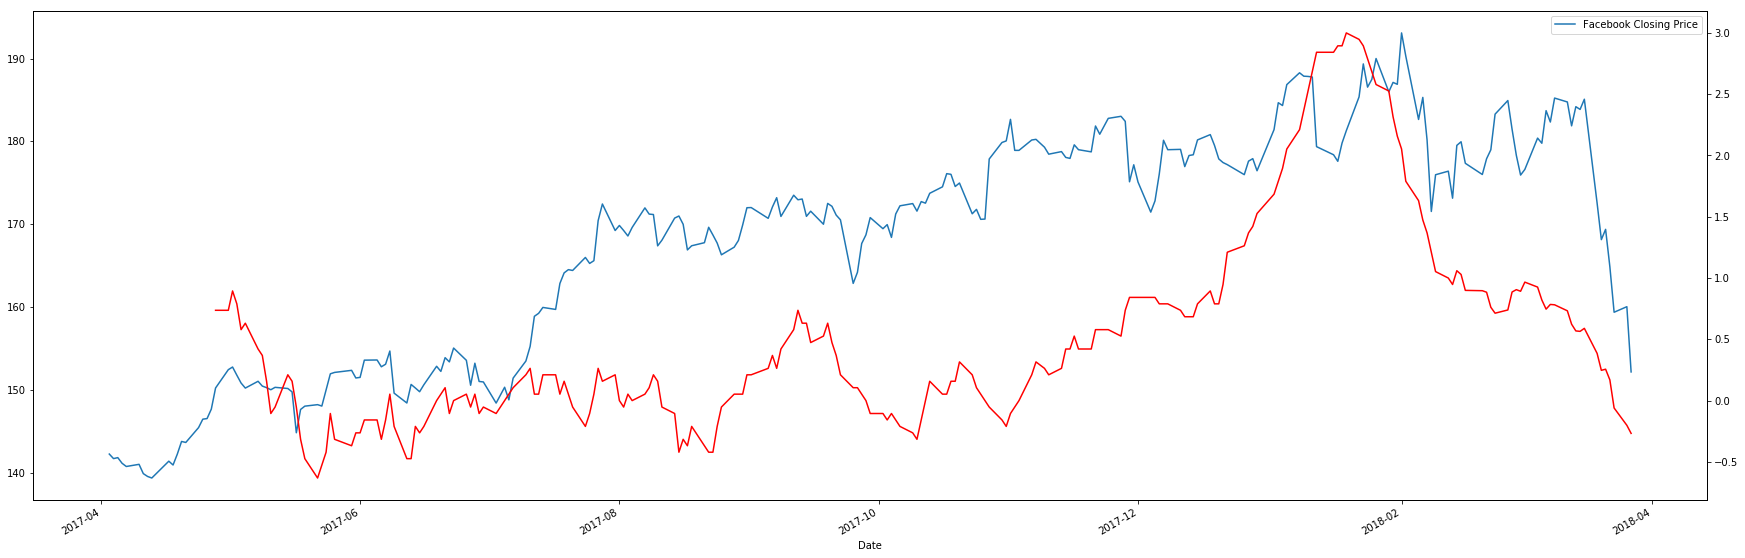

In [21]:
#Facebook sentiment analysis
fig, ax = plt.subplots()
ax2 = ax.twinx()
plt.hold(False)
Fb_merged["adj_close"].plot(ax=ax,kind="line",figsize=(20,10), label='Facebook Closing Price')
Fb_merged["Rolling_mean_19"].plot(ax=ax2, style='r-', secondary_y=True, figsize=(30,10), label='Sentiment Index')
ax.legend(loc='best')

In [22]:
model = LinearRegression().fit(Fb_merged[['FB_Sentiment']], Fb_merged[['adj_close']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
print("Equation of the line: Y = " + str(round(m[0],2)) + "x + " + str(round(b[0],2)))

Equation of the line: Y = 1.78x + 167.07


In [23]:
#Run Additional Stats
import pandas as pd
import statsmodels.formula.api as sm

result = sm.ols(formula="adj_close ~ FB_Sentiment", data=Fb_merged).fit()


print(result.params)
print(result.summary())

Intercept       167.069497
FB_Sentiment      1.780119
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              adj_close   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     13.30
Date:                Tue, 10 Apr 2018   Prob (F-statistic):           0.000324
Time:                        02:49:06   Log-Likelihood:                -987.80
No. Observations:                 247   AIC:                             1980.
Df Residuals:                     245   BIC:                             1987.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


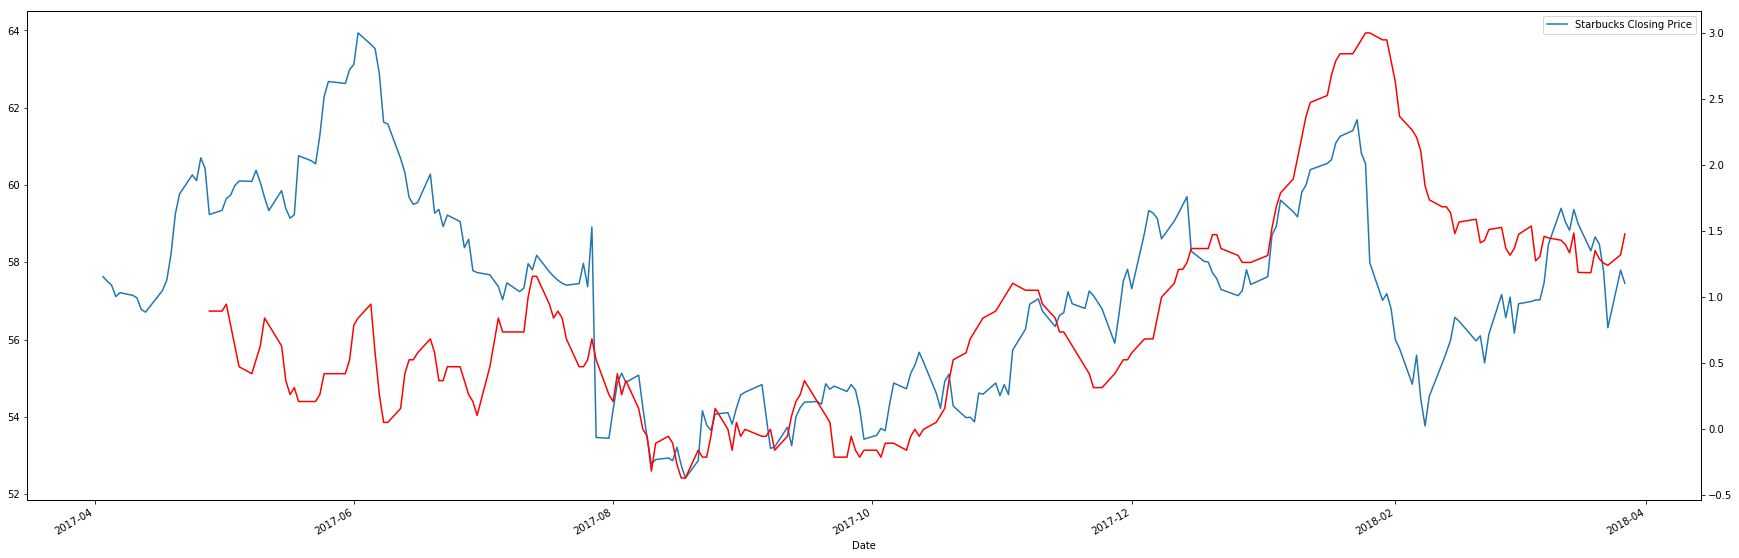

In [24]:
#Starbucks sentiment analysis
fig, ax = plt.subplots()
ax2 = ax.twinx()
plt.hold(False)
Sbux_merged["adj_close"].plot(ax=ax,kind="line",figsize=(20,10), label='Starbucks Closing Price')
Sbux_merged["Rolling_mean_19"].plot(ax=ax2, style='r-', secondary_y=True, figsize=(30,10), label='Sentiment Index')
ax.legend(loc='best')

In [25]:
model = LinearRegression().fit(Sbux_merged[['SBUX_Sentiment']], Sbux_merged[['adj_close']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
print("Equation of the line: Y = " + str(round(m[0],2)) + "x + " + str(round(b[0],2)))

Equation of the line: Y = 0.28x + 57.01


In [26]:
#Run Additional Stats
import pandas as pd
import statsmodels.formula.api as sm

result = sm.ols(formula="adj_close ~ SBUX_Sentiment", data=Sbux_merged).fit()


print(result.params)
print(result.summary())

Intercept         57.013253
SBUX_Sentiment     0.275510
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              adj_close   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     8.860
Date:                Tue, 10 Apr 2018   Prob (F-statistic):            0.00321
Time:                        02:49:10   Log-Likelihood:                -576.14
No. Observations:                 247   AIC:                             1156.
Df Residuals:                     245   BIC:                             1163.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


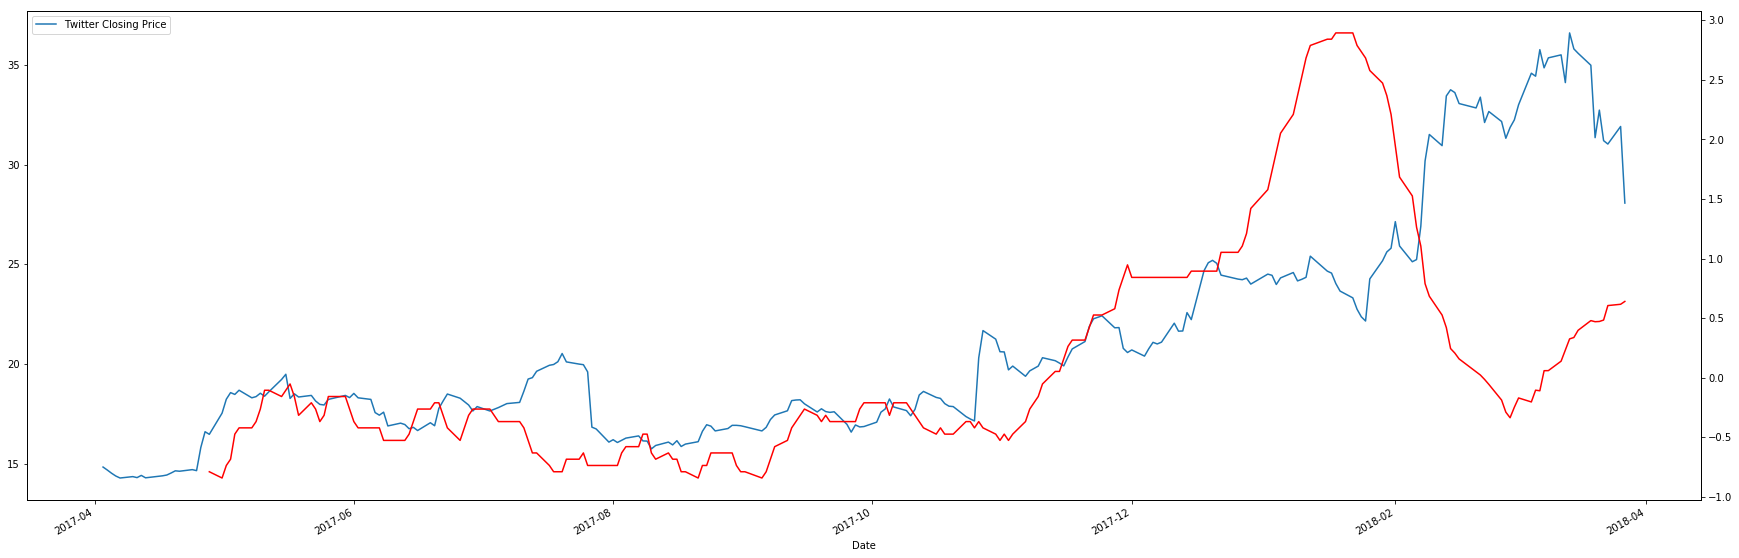

In [27]:
#Twitter Sentiment Analysis
fig, ax = plt.subplots()
ax2 = ax.twinx()
plt.hold(False)
Twtr_merged["adj_close"].plot(ax=ax,kind="line",figsize=(20,10), label='Twitter Closing Price')
Twtr_merged["Rolling_mean_19"].plot(ax=ax2, style='r-', secondary_y=True, figsize=(30,10), label='Sentiment Index')
ax.legend(loc='best')

In [28]:
model = LinearRegression().fit(Twtr_merged[['TWTR_Sentiment']], Twtr_merged[['adj_close']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
print("Equation of the line: Y = " + str(round(m[0],2)) + "x + " + str(round(b[0],2)))

Equation of the line: Y = 1.41x + 20.83


In [29]:
#Run Additional Stats
import pandas as pd
import statsmodels.formula.api as sm

result = sm.ols(formula="adj_close ~ TWTR_Sentiment", data=Twtr_merged).fit()


print(result.params)
print(result.summary())

Intercept         20.834468
TWTR_Sentiment     1.412365
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              adj_close   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.57
Date:                Tue, 10 Apr 2018   Prob (F-statistic):           5.22e-08
Time:                        02:49:14   Log-Likelihood:                -760.10
No. Observations:                 247   AIC:                             1524.
Df Residuals:                     245   BIC:                             1531.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------